## LGM Task 6 - Decision Tree Classifier

Importing libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Dataset

In [55]:
data = pd.read_csv("https://raw.githubusercontent.com/ShalakaPawar/LGMVIP-DataScience/master/Intermediate%20Level%20Tasks/Iris%20Dataset%20Decision%20Tree%20classifier/Iris.csv")

In [56]:
data = data.set_index("Id")
data.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]

Understanding the dataset

In [57]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [58]:
data.shape

(150, 5)

In [59]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64

In [61]:
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


Data Visualization

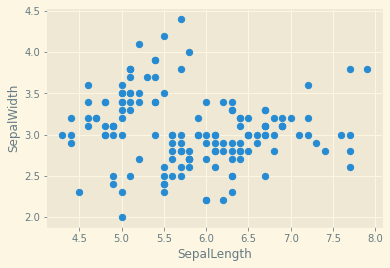

In [62]:
data.plot(kind="scatter", x = "SepalLength", y="SepalWidth", s=40)
plt.show()

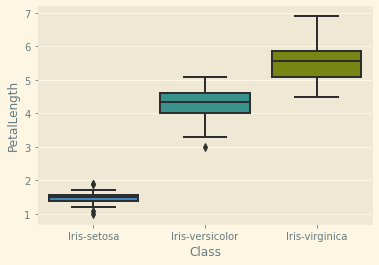

In [63]:
sns.boxplot(x="Class", y="PetalLength", data=data )
plt.show()

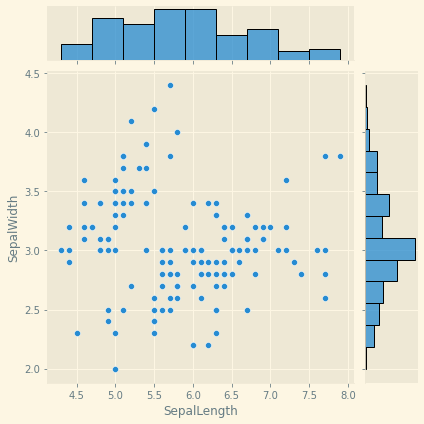

In [64]:
sns.jointplot(x = "SepalLength", y = "SepalWidth",
              kind = "scatter", data = data)

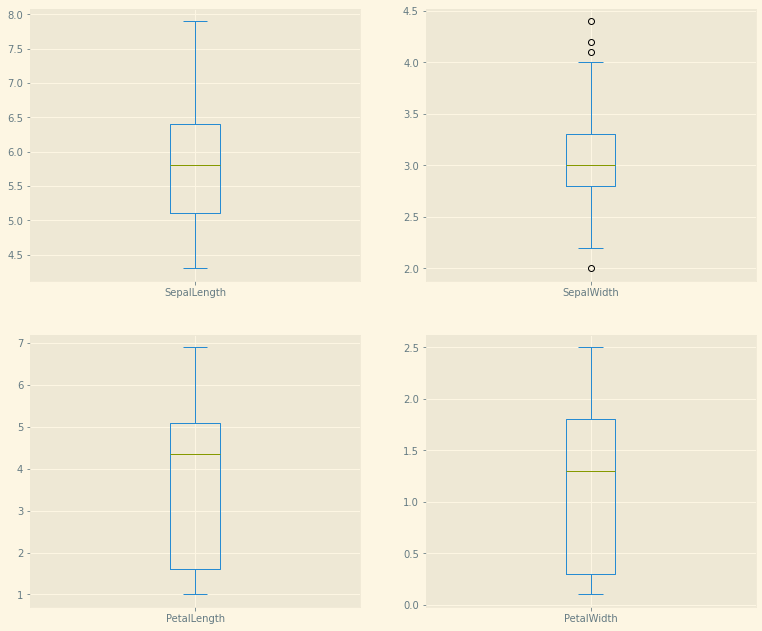

In [65]:
data.iloc[:, :-1].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(13,11))
plt.show()

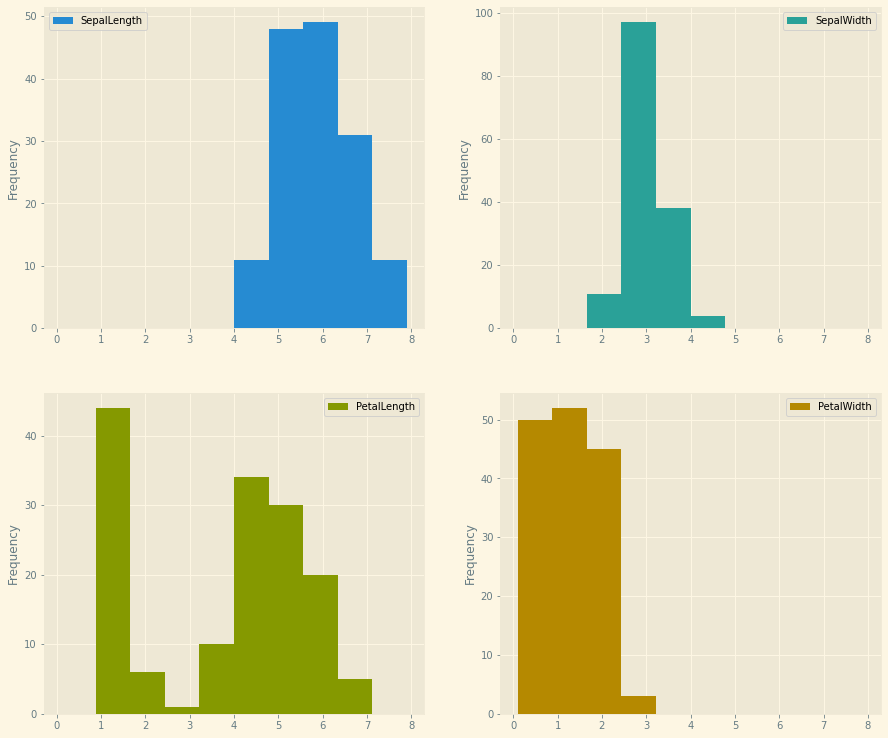

In [66]:
data.iloc[:, :-1].plot(kind='hist', subplots=True, layout = (2,2), sharex=False, sharey=False, figsize=(15,13))
plt.style.use("Solarize_Light2")
plt.show()

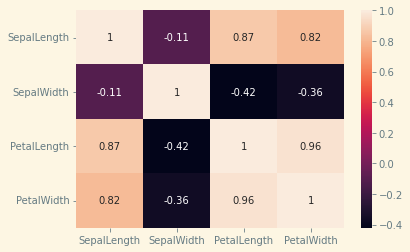

In [67]:
sns.heatmap(data.iloc[:, :-1].corr(), annot=True)

Training the model

In [68]:
X = data.drop("Class",1)
y = data["Class"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [69]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [70]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Class, Length: 150, dtype: object

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [73]:
predictions = classifier.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, predictions)*100
accuracy

97.77777777777777

In [81]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = "accuracy")

In [82]:
cv_results

array([0.90909091, 1.        , 0.90909091, 1.        , 1.        ,
       1.        , 0.9       , 0.8       , 1.        , 0.9       ])

In [83]:
print("Accuracy= ",cv_results.mean())

Accuracy=  0.941818181818182


In [84]:
print("Std deviation = " , cv_results.std())

Std deviation =  0.0653281608117152


In [86]:
confusion_matrix(y_test, predictions)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])